In [ ]:
#impoting of libraries required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# for Staistical testing
from scipy import stats
from scipy.stats import chi2_contingency 
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#reading the dataset available in csv format
df=pd.read_csv("/content/311_Service_Requests_from_2010_to_Present.csv")

In [ ]:
#viewing of first 5 rows of the dataset
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
#shape of the dataset
df.shape

(26862, 53)

In [ ]:
#to check total number of null values for each column
df.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                         164
Agency                                0
Agency Name                           1
Complaint Type                        1
Descriptor                          390
Location Type                         1
Incident Zip                        180
Incident Address                   3123
Street Name                        3123
Cross Street 1                     3526
Cross Street 2                     3564
Intersection Street 1             23762
Intersection Street 2             23802
Address Type                        197
City                                180
Landmark                          26847
Facility Type                       161
Status                                1
Due Date                              1
Resolution Description                1
Resolution Action Updated Date      161
Community Board                       1
Borough                               1


In [ ]:
#check datatypes of columns
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [ ]:
# converting created date column into datetime datatype
df["Created Date"]=pd.to_datetime(df["Created Date"])

In [ ]:
df["Created Date"]

0       2015-12-31 23:59:45
1       2015-12-31 23:59:44
2       2015-12-31 23:59:29
3       2015-12-31 23:57:46
4       2015-12-31 23:56:58
                ...        
55512   2015-11-06 12:38:00
55513   2015-11-06 12:37:00
55514   2015-11-06 12:37:00
55515   2015-11-06 12:37:00
55516   2015-11-06 12:36:00
Name: Created Date, Length: 55517, dtype: datetime64[ns]

In [ ]:
# converting closed date column to datetime datatype
df["Closed Date"]=pd.to_datetime(df["Closed Date"])

In [ ]:
#creating a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing
df["Request_Closing_Time"]=df["Closed Date"]-df["Created Date"]

In [ ]:
df["Request_Closing_Time"]

0       0 days 00:55:15
1       0 days 01:26:16
2       0 days 04:51:31
3       0 days 07:45:14
4       0 days 03:27:02
              ...      
55512   0 days 13:35:00
55513   0 days 02:53:00
55514   0 days 05:46:00
55515   0 days 02:14:00
55516   0 days 00:12:00
Name: Request_Closing_Time, Length: 55517, dtype: timedelta64[ns]

In [ ]:
Request_Closing_Time=[]
for x in (df["Closed Date"]-df["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df["Request_Closing_Time"]=Request_Closing_Time

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26862 entries, 0 to 26861
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Unique Key                      26862 non-null  int64          
 1   Created Date                    26862 non-null  datetime64[ns] 
 2   Closed Date                     26698 non-null  datetime64[ns] 
 3   Agency                          26862 non-null  object         
 4   Agency Name                     26861 non-null  object         
 5   Complaint Type                  26861 non-null  object         
 6   Descriptor                      26472 non-null  object         
 7   Location Type                   26861 non-null  object         
 8   Incident Zip                    26682 non-null  float64        
 9   Incident Address                23739 non-null  object         
 10  Street Name                     23739 non-null  object    

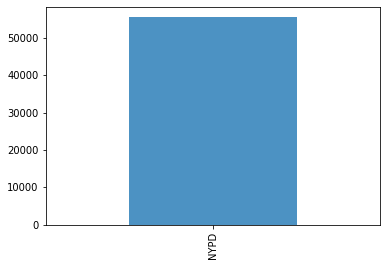

In [ ]:
#major insights from the data
df["Agency"].value_counts().plot(kind="bar",alpha=0.8)

Insight 1: From the code we can conclude that there is only one agency working towards customer service i.e NYPD.

In [ ]:
df["Complaint Type"].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', nan],
      dtype=object)

In [ ]:
num_of_complaints=df["Complaint Type"].value_counts()
num_of_complaints

Blocked Driveway             17453
Illegal Parking              15843
Noise - Commercial            7436
Noise - Street/Sidewalk       4935
Derelict Vehicle              3287
Noise - Vehicle               2288
Animal Abuse                  1355
Traffic                        753
Homeless Encampment            633
Vending                        544
Posting Advertisement          281
Noise - Park                   231
Drinking                       185
Noise - House of Worship       102
Urinating in Public             57
Panhandling                     55
Bike/Roller/Skate Chronic       50
Graffiti                        14
Disorderly Youth                12
Illegal Fireworks                3
Name: Complaint Type, dtype: int64

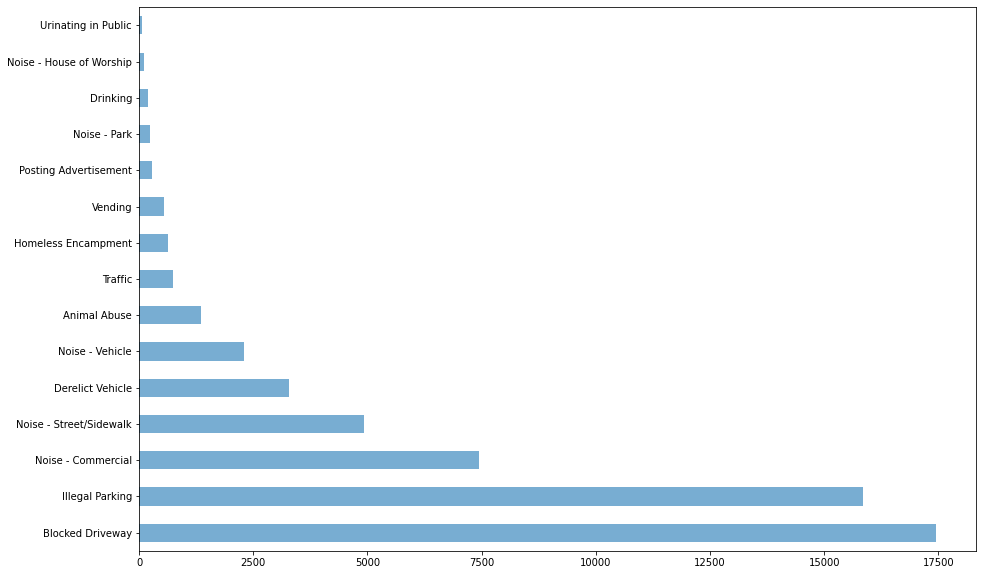

In [ ]:
df['Complaint Type'].value_counts()[:15].plot(kind='barh',alpha=0.6,figsize=(15,10))
plt.show()

Insight 2:
From the above plot we can see that top 3 most frequent complaint types are:
1)Blocked driveway
2)Illegal Parking
3)Noise-Commercial


In [ ]:
df['City'].unique().size

49

In [ ]:
df1=df.groupby(['City','Complaint Type']).size().unstack().fillna(0)
df1.head()

Complaint Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,
ARVERNE,5.0,0.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,15.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0
ASTORIA,27.0,7.0,620.0,65.0,0.0,4.0,0.0,5.0,0.0,273.0,216.0,2.0,2.0,57.0,23.0,0.0,0.0,9.0,1.0,3.0
BAYSIDE,6.0,0.0,70.0,36.0,0.0,0.0,2.0,1.0,0.0,103.0,5.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
BELLEROSE,1.0,0.0,19.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
BREEZY POINT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.shape

(48, 20)

Text(0.5, 1.0, 'Number of complaints vs. City')

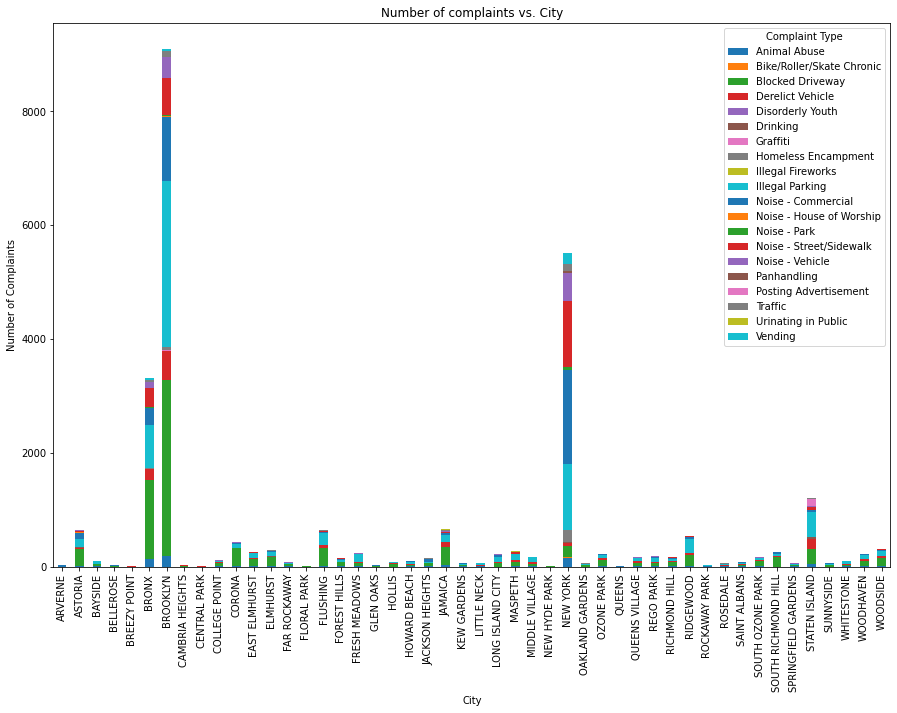

In [ ]:
df1.plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('Number of complaints vs. City')

Insight 3:
Most complaints are registered in Brooklyn


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

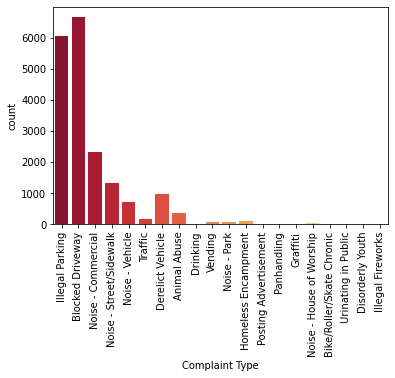

In [ ]:
#df.loc[(df['City']=='BROOKLYN')]['Complaint Type'].value_counts()
plot_1= sns.countplot(x=df.loc[df.City=='BROOKLYN']['Complaint Type'], palette='YlOrRd_r')
plt.xticks(rotation=90)

#plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

Insight 4: Since maximum number of complaints were filed in Brooklyn, hence after analysing the complaint data for this city, it was found that Blocked Driveway was the most frequent complaint lodged to NYPD in the city of Brooklyn.

In [ ]:
df["Request_Closing_Time"].fillna(0)

0         55.250000
1         86.266667
2        291.516667
3        465.233333
4        207.033333
            ...    
26857     78.000000
26858     66.000000
26859     77.000000
26860    131.000000
26861    294.000000
Name: Request_Closing_Time, Length: 26862, dtype: float64

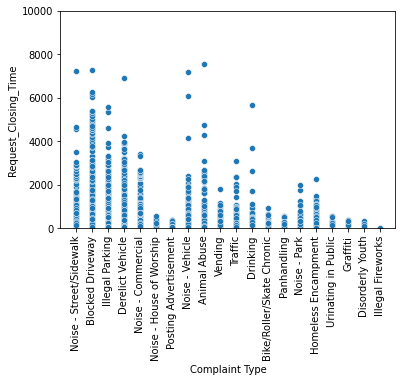

In [ ]:
#Categorical Scatter Plot to understand which type of complaints are taking more time to get resolved
g=sns.scatterplot(x='Complaint Type',y="Request_Closing_Time",data=df)
plt.xticks(rotation=90)
plt.ylim((0,10000))
plt.show()

Insight 5: From the above visualization we can clearly see that Blocked Driveway and Noise-Street/Sidewalk complaints took most of the time to close.

In [ ]:
df['Location Type'].value_counts()

Street/Sidewalk               22170
Store/Commercial               2151
Club/Bar/Restaurant            1701
Residential Building/House      583
Park/Playground                 132
House of Worship                 45
Residential Building             26
Highway                          16
House and Store                  15
Vacant Lot                        8
Commercial                        5
Parking Lot                       5
Roadway Tunnel                    2
Subway Station                    2
Name: Location Type, dtype: int64

In [ ]:
df['Location Type'].fillna(value='Street/Sidewalk',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Street/Sidewalk'),
 Text(0, 0, 'Club/Bar/Restaurant'),
 Text(0, 0, 'Store/Commercial'),
 Text(0, 0, 'House of Worship'),
 Text(0, 0, 'Residential Building/House'),
 Text(0, 0, 'Residential Building'),
 Text(0, 0, 'Park/Playground'),
 Text(0, 0, 'Vacant Lot'),
 Text(0, 0, 'House and Store'),
 Text(0, 0, 'Highway'),
 Text(0, 0, 'Commercial'),
 Text(0, 0, 'Roadway Tunnel'),
 Text(0, 0, 'Subway Station'),
 Text(0, 0, 'Parking Lot')]

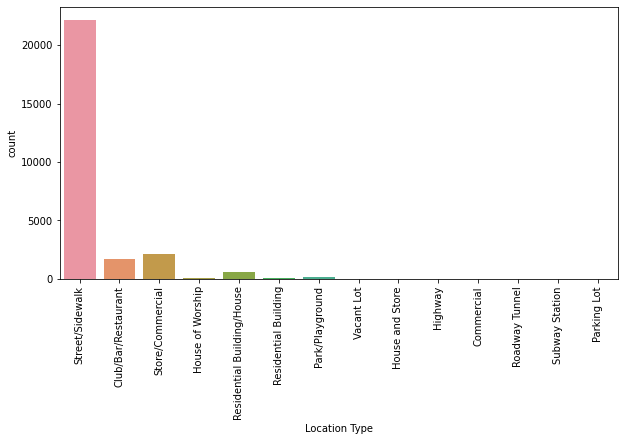

In [ ]:
plt.figure(figsize=(10,5))
plot=sns.countplot(df['Location Type'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

Insight 6:
we can conclude that Street/Sidewalk is the most number of complaints

In [ ]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
df2=pd.DataFrame(df.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")
df2.tail()

,Request_Closing_Time
Location Type,
Residential Building,309.873718
Residential Building/House,353.225115
Commercial,433.013333
Parking Lot,681.503333
Vacant Lot,1591.933333


From the above visualization we can see that vacant lot location complaints took most of the time to get closed.

In [ ]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different cities.

df3=pd.DataFrame(df.groupby("City")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")
df3.tail()

,Request_Closing_Time
City,
ROSEDALE,505.566369
KEW GARDENS,507.401643
WOODHAVEN,514.261689
QUEENS VILLAGE,636.234560
NEW HYDE PARK,824.266667


From the above code we can say that New Hyde Park city took highest average time to close the complaint

In [ ]:
#Performing the statistical test to check Whether the average response time across complaint types is similar or not (overall)

1.Null Hypothesis: The average response time across complaint types is not different
2. Alternate Hypothesis: The average response time across complaint types is different


In [ ]:
# First step is to handle missing values
pd.DataFrame((df.isnull().sum()/df.shape[0]*100)).sort_values(0,ascending=False)[:20]    #calculating percentage of missing values

,0
School or Citywide Complaint,100.000000
Taxi Pick Up Location,100.000000
Ferry Terminal Name,100.000000
Garage Lot Name,100.000000
Ferry Direction,100.000000
Taxi Company Borough,100.000000
Vehicle Type,100.000000
Landmark,99.949565
Road Ramp,99.926149
Bridge Highway Segment,99.926149


In [ ]:
#removing colums with high percenatge of missing values
new_df=df.loc[:,(df.isnull().sum()/df.shape[0]*100)<=50]

In [ ]:
new_df.shape

(55517, 40)

In [ ]:
drop_column=[]
for x in new_df.columns.tolist():
    if new_df[x].nunique()<=3:                                 #nunique() counts number of distinct elements in specified axis
        print(x+ " "*10+" : ",new_df[x].unique())
        drop_column.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified']
School Name           :  ['Unspecified']
School Number           :  ['Unspecified']
School Region           :  ['Unspecified']
School Code           :  ['Unspecified']
School Phone Number           :  ['Unspecified']
School Address           :  ['Unspecified']
School City           :  ['Unspecified']
School State           :  ['Unspecified']
School Zip           :  ['Unspecified' 'Unspec']
School Not Found           :  ['N' nan]


In [ ]:
# drop_column gives the list of columns that doesn't have much significant information that can used for statistical analysis. Hence can be dropped
new_df.drop(drop_column,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_df.shape

(55517, 26)

In [ ]:
new_df

In [ ]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=new_df["Request_Closing_Time"]
anova_df["Complaint"]=new_df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [ ]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()             #here we are using one way anova to get p-value
anova_table=sm.stats.anova_lm(lm)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,19.0,2.397540e+08,1.261863e+07,54.789447,1.017025e-206
Residual,55182.0,1.270904e+10,2.303114e+05,NaN,NaN


From the above results we can clearly see that p-value is very low so we will reject Null hypothesis which means we conclude that the average response time across complaint types is different


**Second: H0:Complaint Type and Location Type are independent**            

**H1:Complaint Type and Location Type are related**

In [ ]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_df["Location Type"]
chi_sq["Complaint Type"]=new_df["Complaint Type"]

chi_sq.dropna(inplace=True)

In [ ]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [ ]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 
print("statistics:",stat,"\n","p-value",p)

alpha = 0.05
if p <= alpha: 
    print('Reject Null hypothesis)') 
else: 
    print('Accept Null Hypothesis') 

statistics: 191889.29754983488 
 p-value 0.0
Reject Null hypothesis)
